# 1. My first profile

In this Notebook, I will explain how to create a profile of voter with embeddings.

In [1]:
import embedded_voting as ev
import numpy as np
import matplotlib.pyplot as plt

## Build a profile

Let's first create **a simple profile** of voters for an election with $m = 6$ candidates and $d = 3$ dimensions for the embeddings.

In [2]:
n_candidates = 5
n_dimensions = 3
my_profile = ev.Profile(n_candidates, n_dimensions)

There is **several ways** to create a profile of voters.

First, you can add *a group of voters* by manually specifying the embeddings and the preferences of theses voters. The embeddings are automatically normalized (unless you specify otherwise). 

In the following cell, the scores given by the voters to the candidates are drawn at random.

In [3]:
embeddings = np.array([[.9,0,.1],
              [.8,.1,0],
              [.1,.1,.9],
              [0,.2,.8],
              [0,1,0],
              [.2,.3,.2],
              [.5,.1,.9]])
scores = np.random.rand(7, n_candidates)
my_profile.add_voters(embeddings, scores, normalize_embs=True)

You can also add voters *one by one*, as it is shown on the following cell. Here I am creating a group of $20$ voters with very similar embeddings and preferences.

In [4]:
for i in range(20):
    embedding = [.8,.2,.2] + np.random.randn(3)*0.02
    score = np.abs([1,0.8,0.5,0.2,0] + np.random.randn(n_candidates)*0.01)
    my_profile.add_voter(embedding, score, normalize_embs=True)

Finally, you can add voters *uniformly distributed* on the positive ortan, with random scores. The following cell add 25 such voters.

In [5]:
my_profile.uniform_distribution(25)

## Visualize the profile

Now that we have a profile, we want to visualize it. Since the number of embeddings dimensions is only 3 in our profile, we can easily plot it on a figure. 

There is two way of plotting your profile, using a *3D* plot or a *ternary* plot :

   * On the <u>**3D plot**</u>, each voter is represented by a line from the origin to its position on the unit sphere.
   * On the <u>**ternary plot**</u>, the surface of the unit sphere is represented in 2D and each voter is represented by a dot.

On the following figures we can see the  <font color=red>red group of voters</font>, which corresponds to the 25 voters with similar embeddings I added above.

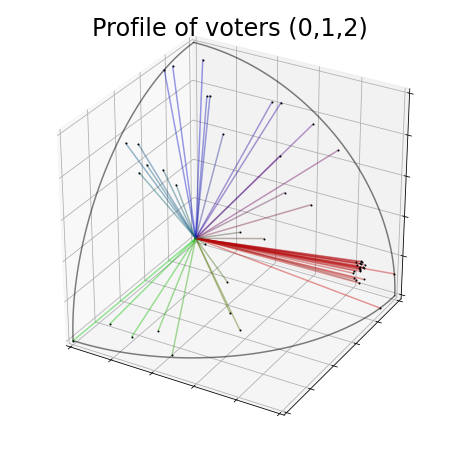

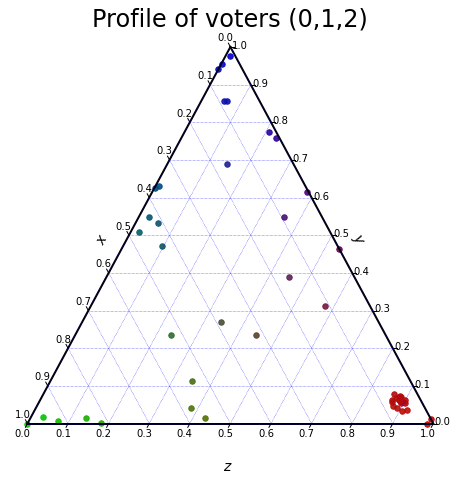

TernaryAxesSubplot: 133059782506

In [6]:
my_profile.plot_profile("3D")
my_profile.plot_profile("ternary")

You can also plot the two figures **side by side** :

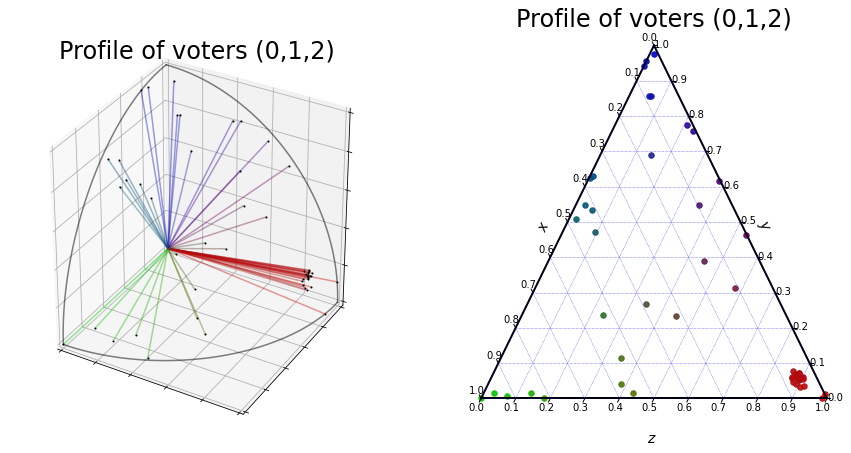

In [7]:
fig = plt.figure(figsize=(15,7.5))
my_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
my_profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

## Visualize the candidates

With the same idea, you can visualize the **candidates**.

   * On a <u>**3D plot**</u>, the score given by a voter to a candidate is represented by the **size of its vector**.
   * On a <u>**ternary plot**</u>, the score given by a voter to a candidate is represented by the **size of the dot**.

Use <tt>plot_candidate</tt> to plot only **one** candidate and <tt>plot_candidates</tt> to plot **all** the candidates. On the following plots, we can see that the  <font color=red>red group</font> really like the first candidate and don't like the last candidate.

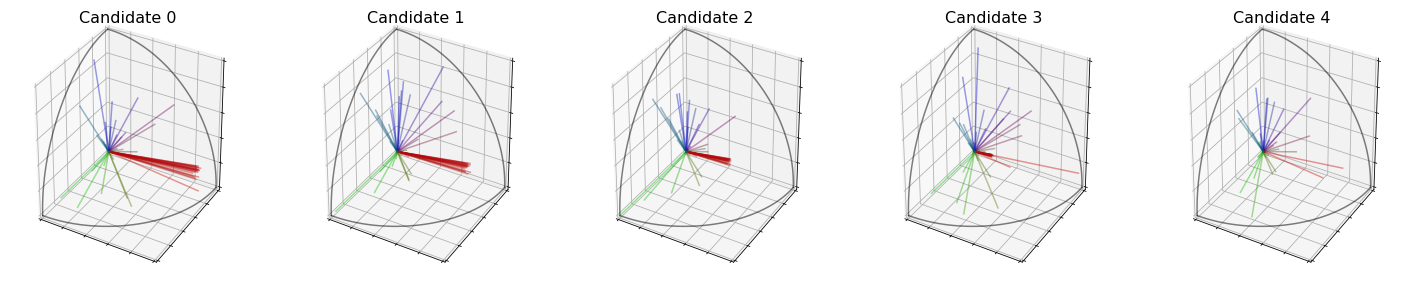

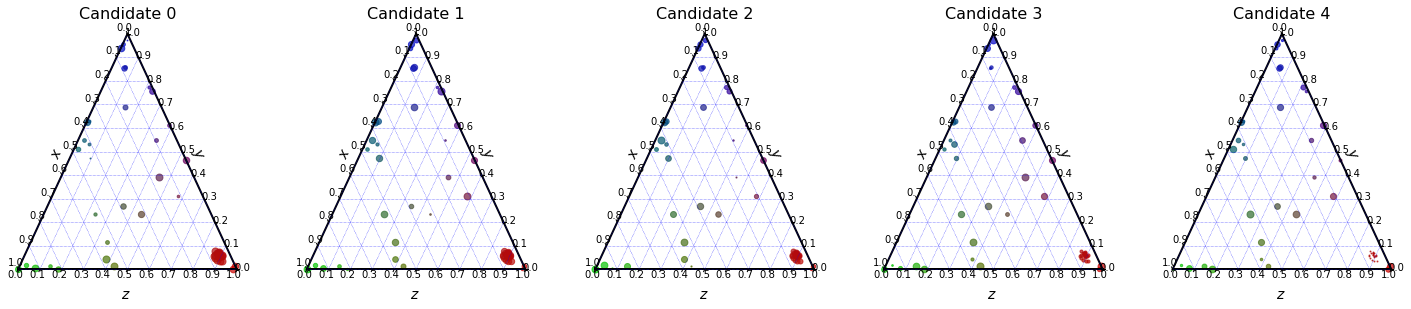

In [8]:
my_profile.plot_candidates("3D")
my_profile.plot_candidates("ternary")

## Beyond 3 dimensions

What if the profile has **more** than 3 dimensions ? 

We still want to visualize the profile and the candidates. 

In the following cell, we create a profil with 4 dimensions.

In [9]:
my_big_profile = ev.Profile(5,4)
my_big_profile.uniform_distribution(50)

We use the functions described above and specify **which dimensions** to use on the plots (we need exactly $3$ dimensions). 

By default, the function use the first three dimensions.

In the following cell, we show the distribution of voters with different subset of the $4$ possible dimensions.

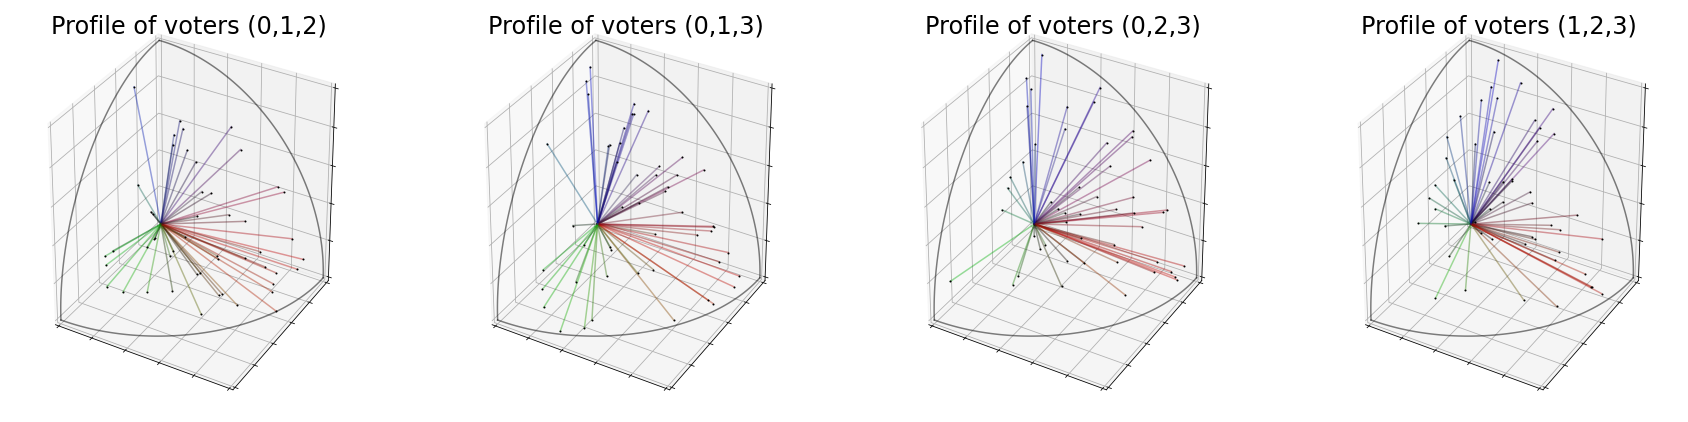

In [10]:
fig = plt.figure(figsize=(30,7.5))
my_big_profile.plot_profile("3D", dim=[0,1,2], fig=fig, position=[1,4,1], show=False)
my_big_profile.plot_profile("3D", dim=[0,1,3], fig=fig, position=[1,4,2], show=False)
my_big_profile.plot_profile("3D", dim=[0,2,3], fig=fig, position=[1,4,3], show=False)
my_big_profile.plot_profile("3D", dim=[1,2,3], fig=fig, position=[1,4,4], show=False)
plt.show()

## Copy a profile

Here is a simple command to **get a copy** of your profile.

In [11]:
my_profile_bis = my_profile.copy()

For the moment, the two profiles are the same :

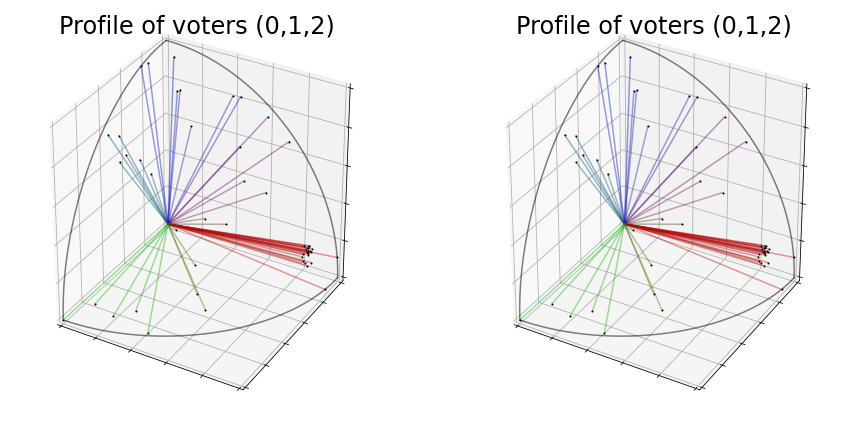

In [12]:
fig = plt.figure(figsize=(15,7.5))
my_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
my_profile_bis.plot_profile("3D", fig=fig, position=[1,2,2], show=False)
plt.show()

Now, let's **add** 100 voters to the new profile :

In [13]:
my_profile_bis.uniform_distribution(100)

The new voters only appears on the second profile :

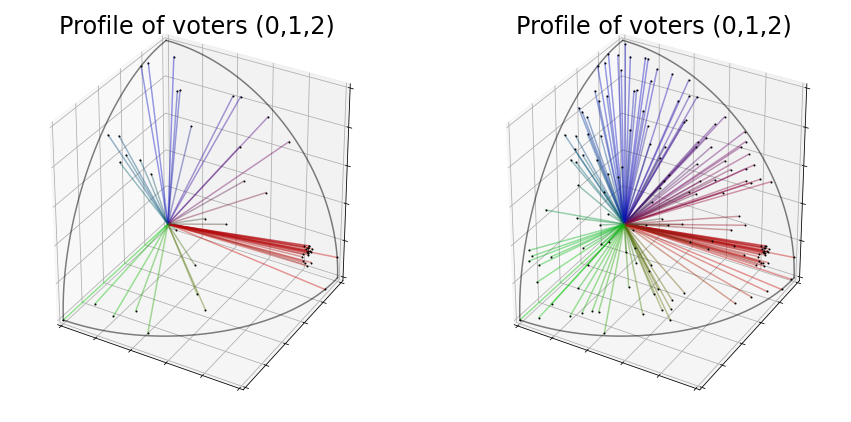

In [14]:
fig = plt.figure(figsize=(15,7.5))
my_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
my_profile_bis.plot_profile("3D", fig=fig, position=[1,2,2], show=False)
plt.show()

## Recenter and dilate a profile

Sometimes the voters' embeddings are really close and it is hard to do anything with the profile, because it looks like every voter is the same. 

For instance, we can create three groups of voters with **very similar embeddings** :

In [15]:
small_profile = ev.Profile(n_candidates, n_dimensions)
embeddings = np.array([[.9,.3,.3],[.8,.4,.3],[.8,.3,.4]])
scores = np.random.rand(3, n_candidates)
small_profile.add_voters(embeddings, scores, normalize_embs=True)

If I plot this profile, the three voters are really close to each other :

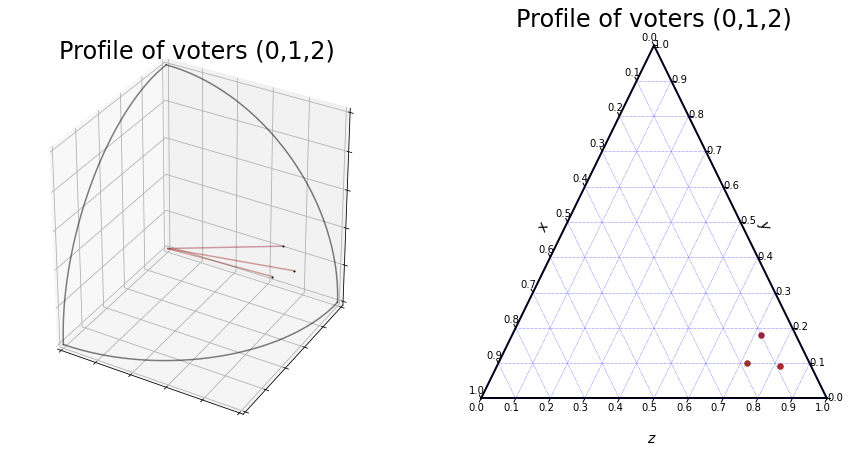

In [16]:
fig = plt.figure(figsize=(15,7.5))
small_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
small_profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

The first thing we can do is **to recenter** the population of voter :

In [17]:
small_profile_optimized = small_profile.copy()
small_profile_optimized.recenter()

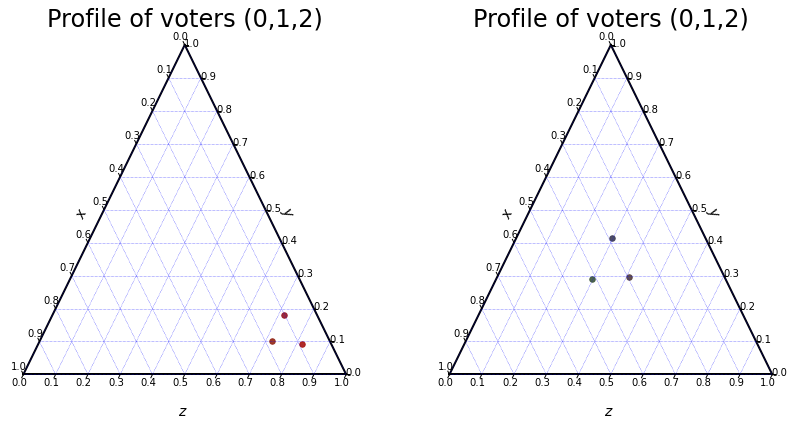

In [18]:
fig = plt.figure(figsize=(14,7))
small_profile.plot_profile("ternary", fig=fig, position=[1,2,1], show=False)
small_profile_optimized.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

Now, we can **dilate** the profile in such a way that the **relative distance** between each pair of voters remains the same, but they **take all the space they can** on the positive ortan. 

To do so, we use the funtion <tt>dilate</tt>. 

In [19]:
small_profile_optimized.dilate()

As you can see on the second plot, voters are **pushed to the extreme positions** of the ortan.

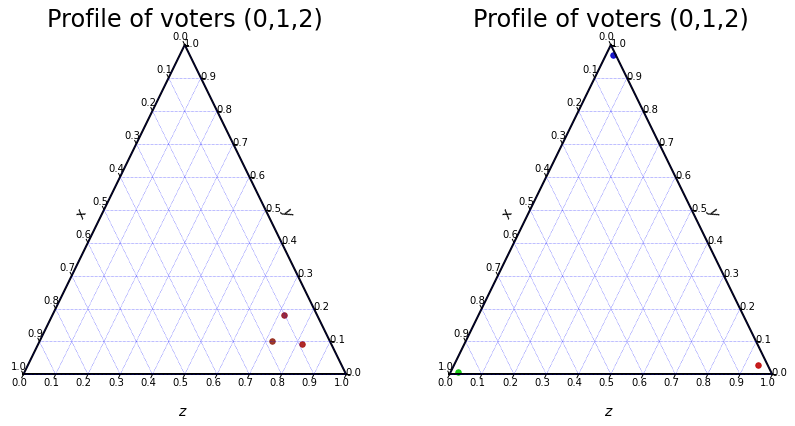

In [20]:
fig = plt.figure(figsize=(14,7))
small_profile.plot_profile("ternary", fig=fig, position=[1,2,1], show=False)
small_profile_optimized.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

## Introduction to parametric profiles

Our package also propose an easy way to build a profile with *"groups"* of voters **who have similar embeddings and preferences**.

To do so, we need to specify :

   * The number of **candidates**, **dimensions**, and **voters** in the profile.
   * The matrix $M$ of **scores of each "group"**. $M(i,j)$ is the score given by the group $j$ to the candidate $i$.
   * The **proportion** of the voters in each group.
   
For instance, in the following cell, I am building a profile of $100$ voters in $3$ dimensions, with $5$ candidates. There is $3$ groups in this profile :

   * The  **<font color=red>red group</font>**, with $50\%$ of the voters. Voters from this group have preferences close to $c_0 > c_1 > c_2 > c_3 > c_4$.
   * The **<font color=green>green group</font>**, with $30\%$ of the voters. Voters from this group have preferences close to $c_1 \sim c_3 > c_0 \sim c_2 \sim c_4$.
   * The  **<font color=blue>blue group</font>**, with $20\%$ of the voters. Voters from this group have preferences close to $c_4 > c_3 > c_2 > c_1 > c_0$.

In [21]:
scores_matrix = [[1, .7, .5, .3, 0], [.2, .8, .2, .8, .2], [0, .3, .5, .7, 1]]
proba = [.5, .3, .2]
n_voters = 100
parametric_profile = ev.ParametricProfile(n_candidates, n_dimensions, n_voters, scores_matrix, proba)

Then, we need to specify the **level of <u>polarisation</u>** of the profile. 

A *high* level of polarisation ($> 0.5$) means that voters in the different groups are aligned with the dimension of each group. Therefore, there embeddings are really similar.

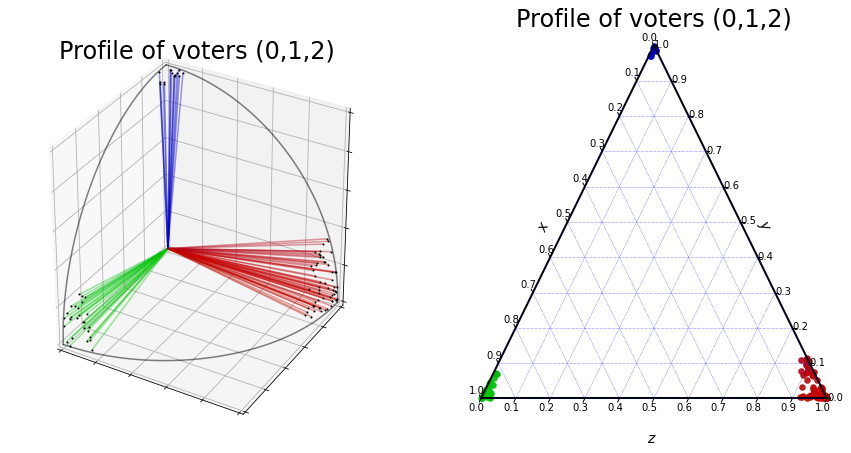

In [22]:
parametric_profile.set_parameters(polarisation=0.7)

fig = plt.figure(figsize=(15,7.5))
parametric_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
parametric_profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

On the opposite, if the level of polarisation is *low* ($< 0.5$), then voters' embeddings are more random.

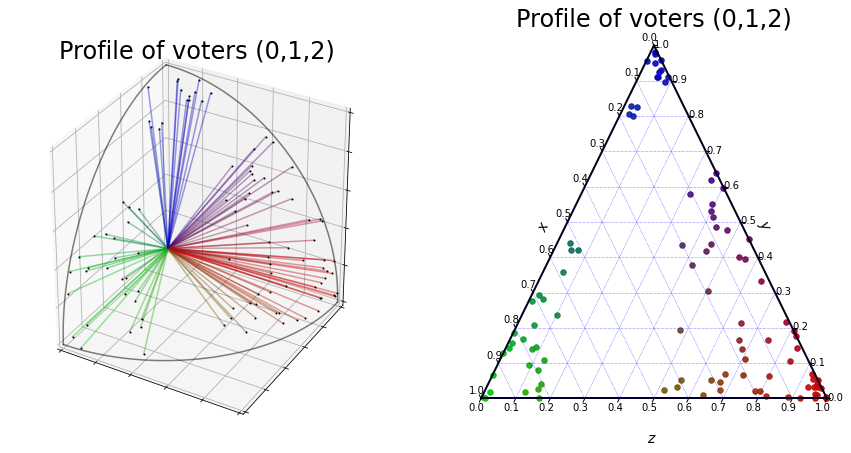

In [23]:
parametric_profile.set_parameters(polarisation=0.2)
fig = plt.figure(figsize=(15,7.5))
parametric_profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
parametric_profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

The second important parameter is **<u>coherence</u>**. 

The coherence parameter caracterize the **correlation** between the embeddings a voter and the score he gives to the candidates. If this parameter is set to $1$ then the scores of a group **dictate** the scores of the voters in this group.

By default, it is set to $0$, which means that the scores are **totally random** and there is no correlation between the embeddings and the scores.

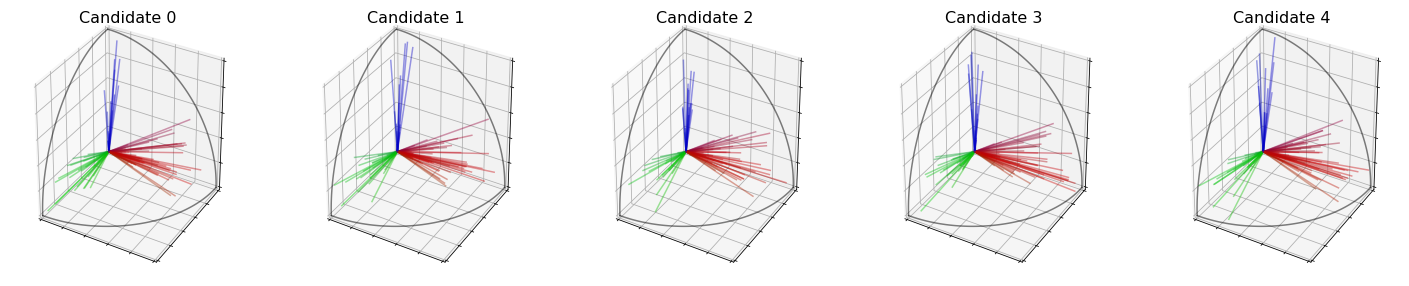

In [24]:
parametric_profile.set_parameters(polarisation=0.5)
parametric_profile.plot_candidates()

In the following cell, we can see that a *high* coherence implies that embeddings and scores are very correlated.

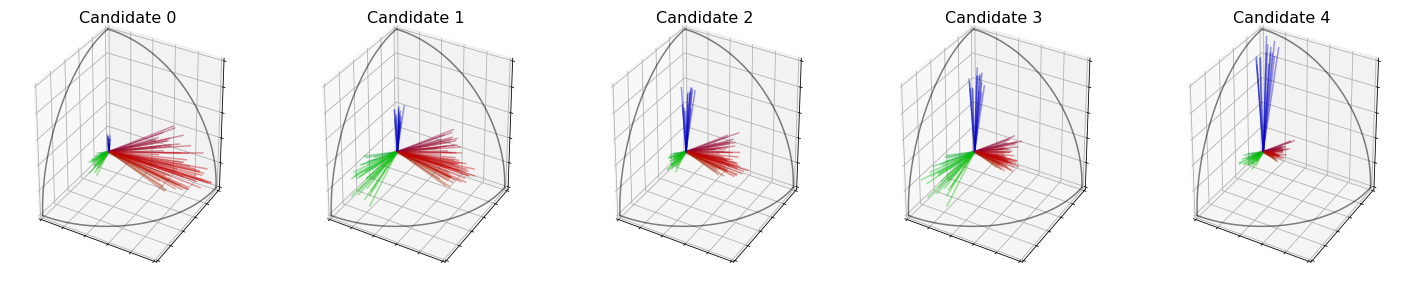

In [25]:
parametric_profile.set_parameters(polarisation=.5, coherence=.8)
parametric_profile.plot_candidates()

If you want to **easily create a parametric profile** with random scores for each groups, you can do the following :

In [26]:
parametric_profile_bis = ev.ParametricProfile(n_candidates, n_dimensions, n_voters).set_parameters(.6,.8)

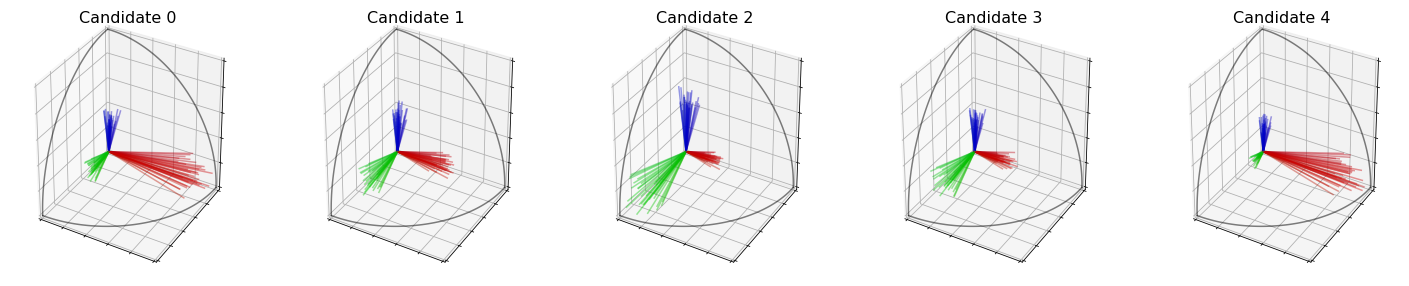

In [27]:
parametric_profile_bis.plot_candidates()